# Naive Bayes Algorithm

**Naive Bayes** is a classification algorithm that works based on the Bayes theorem. Before explaining about Naive Bayes, first, we should discuss Bayes Theorem. Bayes theorem is used to find the probability of a hypothesis with given evidence.

In [2]:
from IPython.display import Image

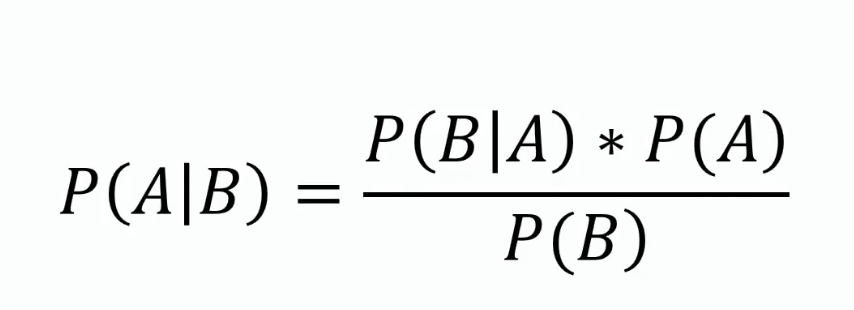

In [3]:
Image('34725nv1.png')

In this, using Bayes theorem we can find the probability of A, given that B occurred. A is the hypothesis and B is the evidence.

P(B|A) is the probability of B given that A is True.

P(A) and P(B) is the independent probabilities of A and B.

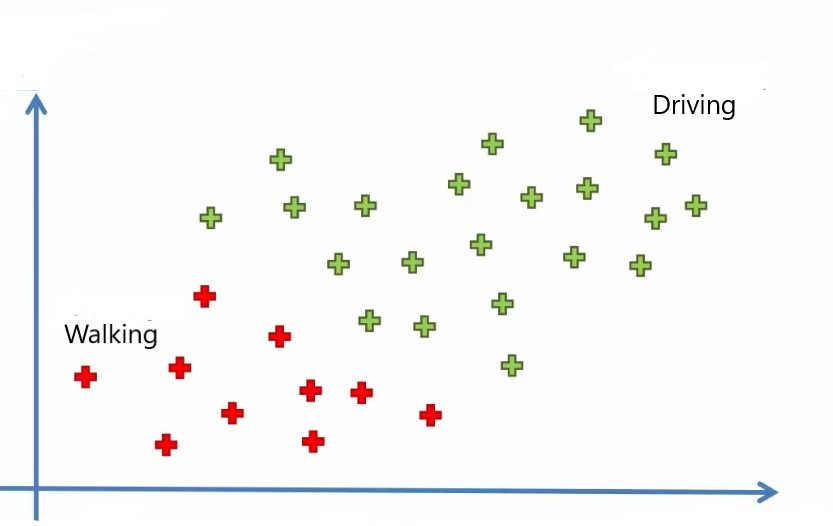

In [5]:
Image('30337nv.png')

### The concept behind the algorithm
Let’s understand the concept of the Naive Bayes Theorem through an example. We are taking a dataset of employees in a company, our aim is to create a model to find whether a person is going to the office by driving or walking using salary and age of the person.

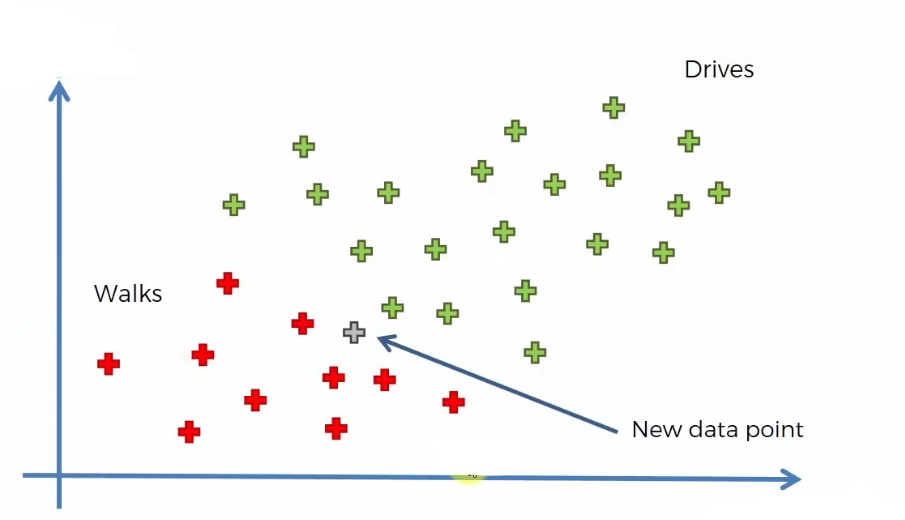

In [6]:
Image("75704nv3.png")

In the above, we can see 30 data points in which red points belong to those who are walking and green belongs to those who are driving. Now let’s add a new data point into it. Our aim is to find the category that the new point belongs to.

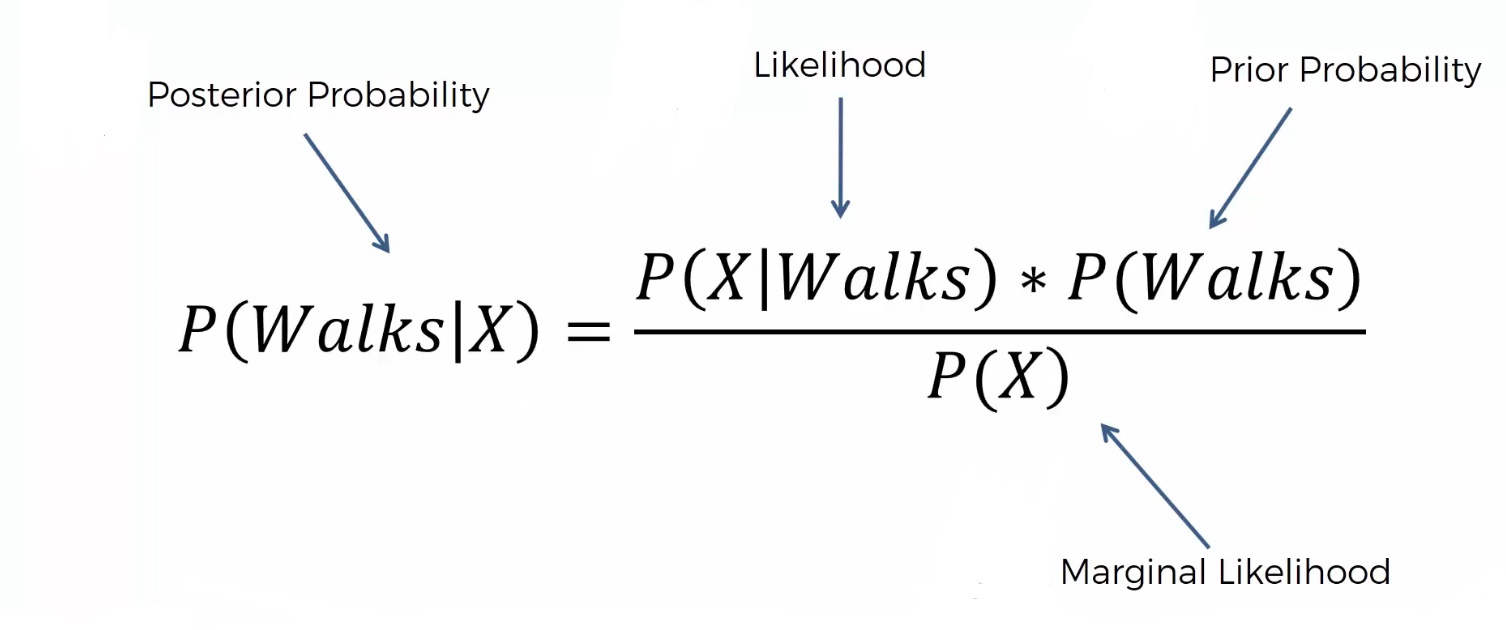

In [7]:
Image('60483nv4.png')

Note that we are taken age on the X-axis and Salary on the Y-axis. We are using the Naive Bayes algorithm to find the category of the new data point. For this, we have to find the posterior probability of walking and driving for this data point. After comparing, the point belongs to the category having a higher probability.

The posterior probability of walking for the new data point is :

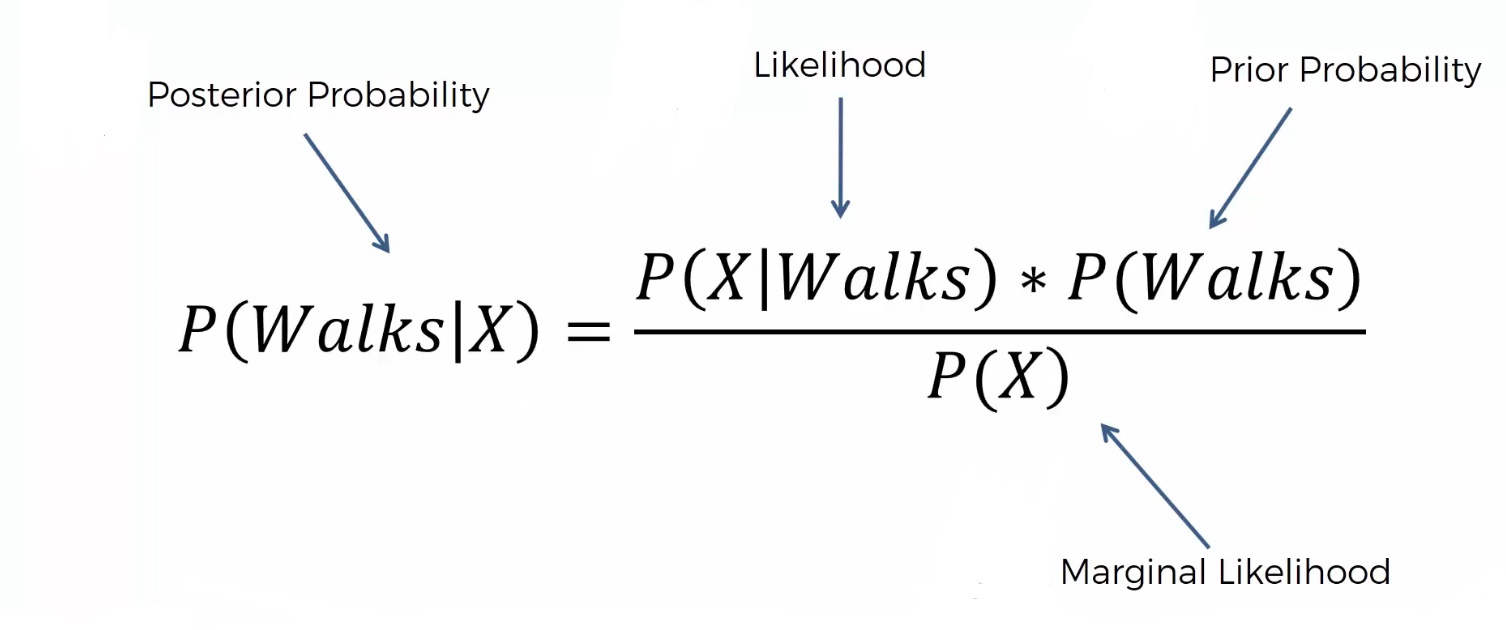

In [8]:
Image("16968nv4.png")

also for the driving is :

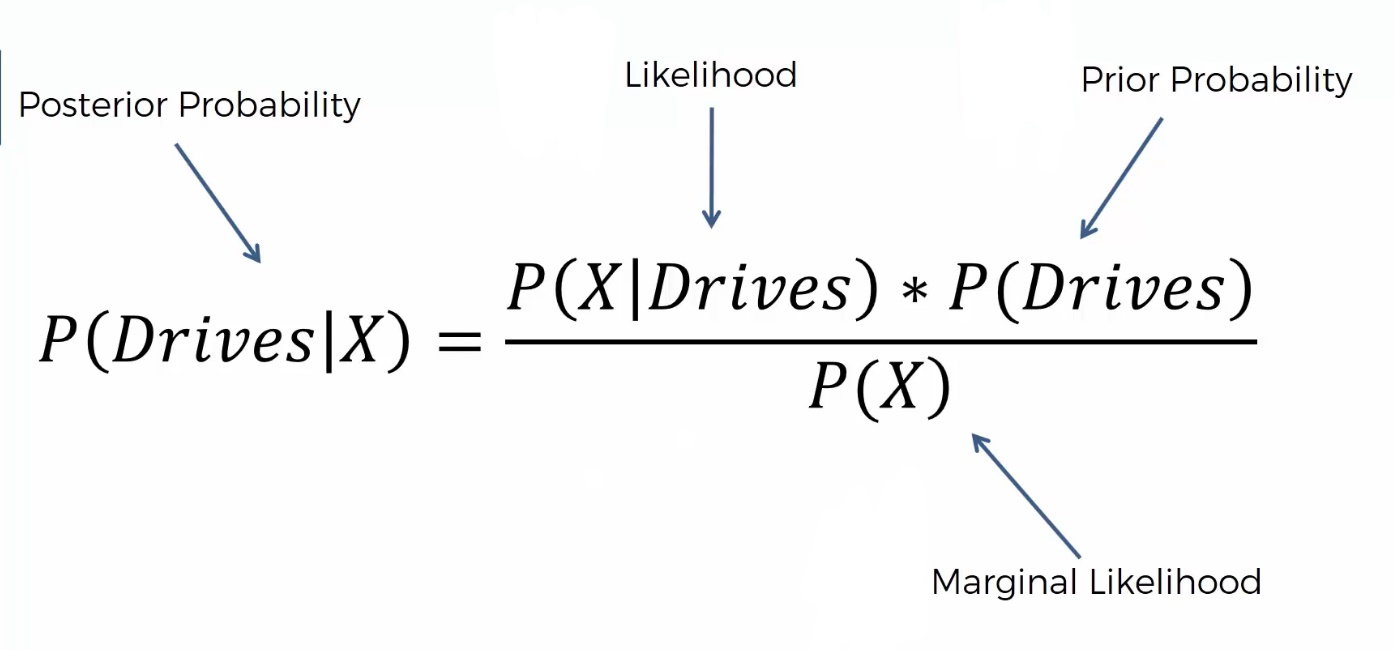

In [9]:
Image('67866nv5.png')

## Steps involved in Naive Bayes algorithm
Step 1: We have to find all the probabilities required for the Bayes theorem for the calculation of posterior probability

P(Walks) is simply the probability of those who walk among all

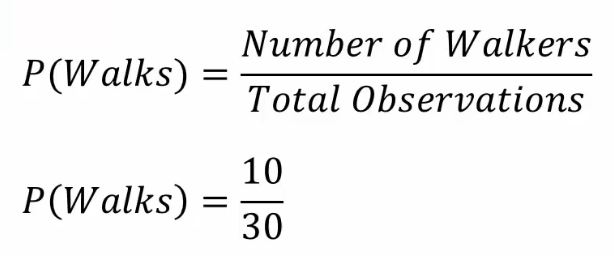

In [10]:
Image("73188nv6.png")

In order to find the marginal likelihood, P(X), we have to consider a circle around the new data point of any radii including some red and green points.

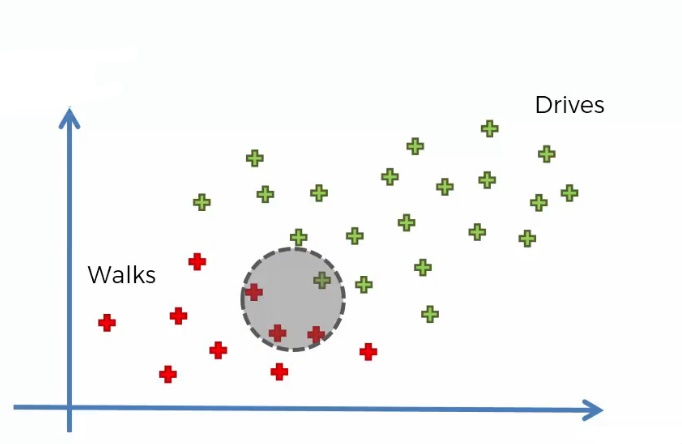

In [11]:
Image("28024nv7.png")

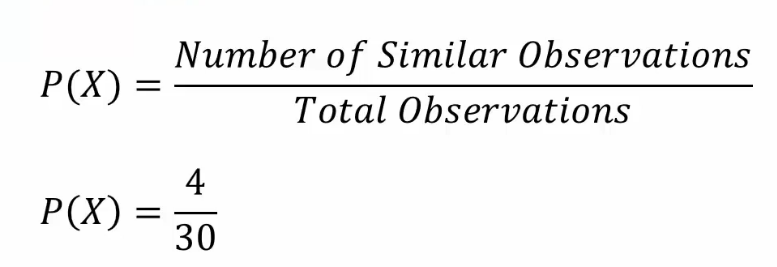

In [12]:
Image("15449nv8.png")

P(X|Walks) can be found by : 

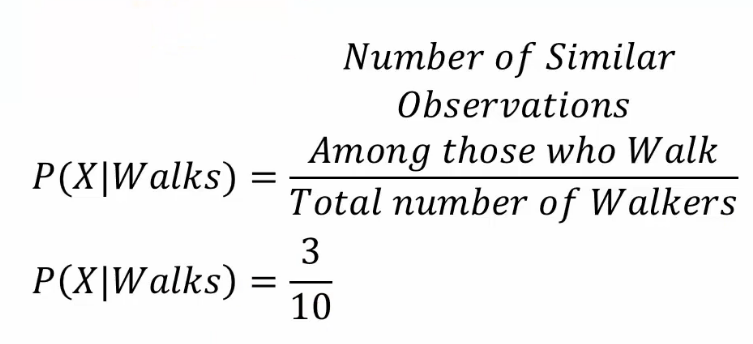

In [13]:
Image('33413nv9.png')

Now we can find the posterior probability using the Bayes theorem,

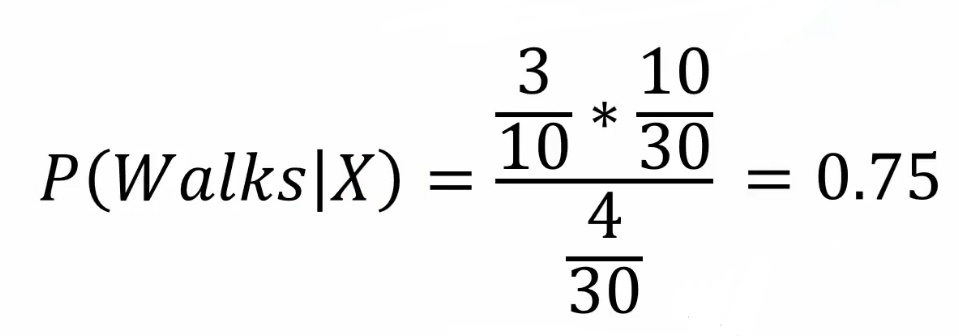

In [14]:
Image("17457nv10.png")

#### Step 2:
Similarly we can find the posterior probability of Driving, and it is 0.25

#### Step 3: 
Compare both posterior probabilities. When comparing the posterior probability, we can find that P(walks|X) has greater values and the new point belongs to the walking category.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [7]:
y_pred  =  classifier.predict(X_test)

In [8]:
y_pred  

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [9]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [11]:
ac

0.925

# Implementation 2

In [12]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('Diabetes_RF.csv')

In [14]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [15]:
col_names=list(df.columns)
predictors=col_names[0:8]
target=col_names[8]


In [16]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3,random_state=0)

In [17]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
train_pred_gau=Gmodel.fit(train[predictors],train[target]).predict(train[predictors])
test_pred_gau=Gmodel.fit(train[predictors],train[target]).predict(test[predictors])

In [18]:
train_acc_gau=np.mean(train_pred_gau==train[target])
test_acc_gau=np.mean(test_pred_gau==test[target])
train_acc_gau#0.767
test_acc_gau#0.761

0.7619047619047619

In [19]:
from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
train_pred_multi=Mmodel.fit(train[predictors],train[target]).predict(train[predictors])
test_pred_multi=Mmodel.fit(train[predictors],train[target]).predict(test[predictors])

In [20]:
train_acc_multi=np.mean(train_pred_multi==train[target])
test_acc_multi=np.mean(test_pred_multi==test[target])
train_acc_multi#0.588
test_acc_multi#0.649

0.6493506493506493

# Implementation 3

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
salary_train=pd.read_csv('SalaryData_Train.csv')
salary_test=pd.read_csv('SalaryData_Test.csv')

In [23]:
salary_train.columns
salary_test.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [24]:
string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']

In [25]:
from sklearn import preprocessing

In [26]:
label_encoder=preprocessing.LabelEncoder()
for i in string_columns:
    salary_train[i]=label_encoder.fit_transform(salary_train[i])
    salary_test[i]=label_encoder.fit_transform(salary_test[i])


In [27]:
col_names=list(salary_train.columns)
train_X=salary_train[col_names[0:13]]
train_Y=salary_train[col_names[13]]
test_x=salary_test[col_names[0:13]]
test_y=salary_test[col_names[13]]

In [28]:
from sklearn.naive_bayes import GaussianNB
Gmodel=GaussianNB()
train_pred_gau=Gmodel.fit(train_X,train_Y).predict(train_X)
test_pred_gau=Gmodel.fit(train_X,train_Y).predict(test_x)

In [29]:
train_acc_gau=np.mean(train_pred_gau==train_Y)
test_acc_gau=np.mean(test_pred_gau==test_y)
train_acc_gau#0.795
test_acc_gau#0.794


0.7946879150066402

In [30]:
from sklearn.naive_bayes import MultinomialNB
Mmodel=MultinomialNB()
train_pred_multi=Mmodel.fit(train_X,train_Y).predict(train_X)
test_pred_multi=Mmodel.fit(train_X,train_Y).predict(test_x)

In [31]:
train_acc_multi=np.mean(train_pred_multi==train_Y)
test_acc_multi=np.mean(test_pred_multi==test_y)
train_acc_multi#0.772
test_acc_multi#0.774

0.7749667994687915